In [1]:
text = readlines("inputa")
points =[]
gridsize=0
for line in text
    numline = parse.(Int, split(line, ","))
    push!(points, numline)
    if maximum(numline)>gridsize
        gridsize=maximum(numline)

    end
end
println(points)
println(length(points))
println(gridsize)

Any[[7, 1], [11, 1], [11, 7], [9, 7], [9, 5], [2, 5], [2, 3], [7, 3]]
8
11


In [2]:
using Meshes

# Define polygon vertices
vertices = [(0.0, 0.0), (5.0, 0.0), (5.0, 5.0), (0.0, 5.0)]

# Create a polygon
poly = SimplePolygon(Point2.(vertices))  # SimplePolygon from Meshes.jl

# Create a grid of points to test
xrange = 0.0:0.1:5.0
yrange = 0.0:0.1:5.0
points = [Point2(x,y) for x in xrange, y in yrange]
points = vec(points)  # flatten the 2D grid

# Filter points inside the polygon
inside_points = [p for p in points if inpolygon(p, poly)]

println("Number of points inside: ", length(inside_points))

UndefVarError: UndefVarError: `Point2` not defined

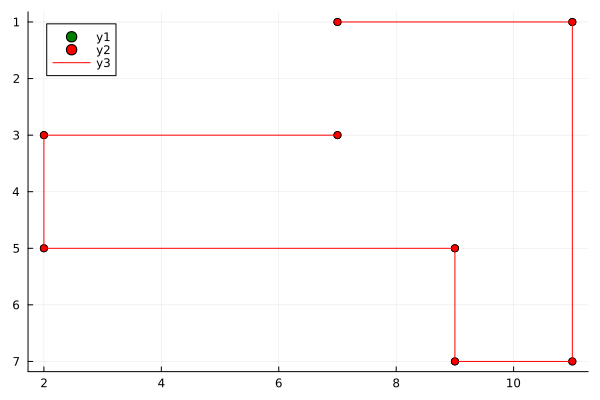

In [15]:
using Plots
xr = first.(points)
yr = last.(points)
xg = first.(inside_points)
yg = last.(inside_points)
p=plot()
scatter!(xg, yg, color = :green, yflip = true)
scatter!(xr, yr, color = :red, yflip = true)
plot!(xr, yr, color = :red, yflip = true)
display(p)

In [13]:

green = []
for i in 1:length(points)
    if i == length(points)
        p1 = points[i]
        p2 = points[1]
    else
        p1 = points[i]
        p2 = points[i+1]
    end
    if p1[1] == p2[1]
        for j in minimum([p1[2],p2[2]])+1:maximum([p1[2],p2[2]])-1
            push!(green, [p1[1],j])
        end
    elseif p1[2] == p2[2]
        for j in minimum([p1[1],p2[1]])+1:maximum([p1[1],p2[1]])-1
            push!(green, [j, p1[2]])
        end
    end
end
println(green)
println(length(green))



Any[[8, 1], [9, 1], [10, 1], [11, 2], [11, 3], [11, 4], [11, 5], [11, 6], [10, 7], [9, 6], [3, 5], [4, 5], [5, 5], [6, 5], [7, 5], [8, 5], [2, 4], [3, 3], [4, 3], [5, 3], [6, 3], [7, 2]]
22


In [66]:

green = []
fill = true
for i in 1:length(points)
    if i == length(points)
        p1 = points[i]
        p2 = points[1]
        p3 = points[2]
    elseif i==length(points)-1
        p1 = points[i]
        p2 = points[i+1]
        p3 = points[1]
    else
        p1 = points[i]
        p2 = points[i+1]
        p3 = points[i+2]
    end
    if !fill 
        if p1[1] == p2[1]
            for j in minimum([p1[2],p2[2]])+1:maximum([p1[2],p2[2]])-1
                push!(green, [p1[1],j])
            end
        elseif p1[2] == p2[2]
            for j in minimum([p1[1],p2[1]])+1:maximum([p1[1],p2[1]])-1
                push!(green, [j, p1[2]])
            end
        end
    else
        for i in minimum([p1[1], p3[1]]): maximum([p1[1], p3[1]])
            for j in minimum([p1[2], p3[2]]): maximum([p1[2], p3[2]])
                push!(green, [i,j])
            end
        end
    end
    fill = !fill
end
println(green)
println(length(green))



Any[[7, 1], [7, 2], [7, 3], [7, 4], [7, 5], [7, 6], [7, 7], [8, 1], [8, 2], [8, 3], [8, 4], [8, 5], [8, 6], [8, 7], [9, 1], [9, 2], [9, 3], [9, 4], [9, 5], [9, 6], [9, 7], [10, 1], [10, 2], [10, 3], [10, 4], [10, 5], [10, 6], [10, 7], [11, 1], [11, 2], [11, 3], [11, 4], [11, 5], [11, 6], [11, 7], [11, 2], [11, 3], [11, 4], [11, 5], [11, 6], [9, 5], [9, 6], [9, 7], [10, 5], [10, 6], [10, 7], [11, 5], [11, 6], [11, 7], [9, 6], [2, 3], [2, 4], [2, 5], [3, 3], [3, 4], [3, 5], [4, 3], [4, 4], [4, 5], [5, 3], [5, 4], [5, 5], [6, 3], [6, 4], [6, 5], [7, 3], [7, 4], [7, 5], [8, 3], [8, 4], [8, 5], [9, 3], [9, 4], [9, 5], [2, 4], [2, 1], [2, 2], [2, 3], [3, 1], [3, 2], [3, 3], [4, 1], [4, 2], [4, 3], [5, 1], [5, 2], [5, 3], [6, 1], [6, 2], [6, 3], [7, 1], [7, 2], [7, 3], [7, 2]]
94


In [67]:
allpoints = vcat(points, green)
println(length(allpoints))
println(allpoints)

102
Any[[7, 1], [11, 1], [11, 7], [9, 7], [9, 5], [2, 5], [2, 3], [7, 3], [7, 1], [7, 2], [7, 3], [7, 4], [7, 5], [7, 6], [7, 7], [8, 1], [8, 2], [8, 3], [8, 4], [8, 5], [8, 6], [8, 7], [9, 1], [9, 2], [9, 3], [9, 4], [9, 5], [9, 6], [9, 7], [10, 1], [10, 2], [10, 3], [10, 4], [10, 5], [10, 6], [10, 7], [11, 1], [11, 2], [11, 3], [11, 4], [11, 5], [11, 6], [11, 7], [11, 2], [11, 3], [11, 4], [11, 5], [11, 6], [9, 5], [9, 6], [9, 7], [10, 5], [10, 6], [10, 7], [11, 5], [11, 6], [11, 7], [9, 6], [2, 3], [2, 4], [2, 5], [3, 3], [3, 4], [3, 5], [4, 3], [4, 4], [4, 5], [5, 3], [5, 4], [5, 5], [6, 3], [6, 4], [6, 5], [7, 3], [7, 4], [7, 5], [8, 3], [8, 4], [8, 5], [9, 3], [9, 4], [9, 5], [2, 4], [2, 1], [2, 2], [2, 3], [3, 1], [3, 2], [3, 3], [4, 1], [4, 2], [4, 3], [5, 1], [5, 2], [5, 3], [6, 1], [6, 2], [6, 3], [7, 1], [7, 2], [7, 3], [7, 2]]


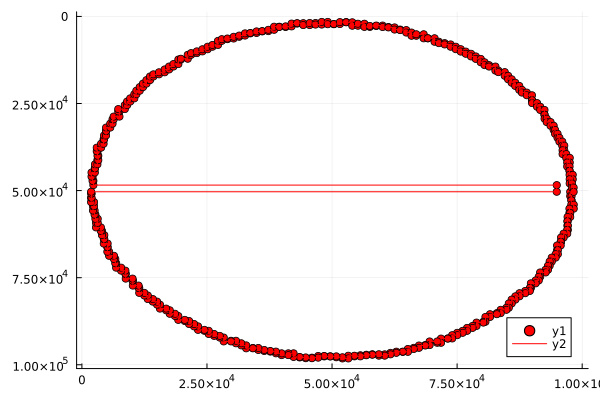

In [ ]:
using Plots
plotly()
xr = first.(points)
yr = last.(points)
#xg = first.(green)
#yg = last.(green)
p=plot()
#scatter!(xg, yg, color = :green, yflip = true)
scatter!(xr, yr, color = :red, yflip = true)
plot!(xr, yr, color = :red, yflip = true)
display(p)


In [4]:
t1=[[94918,50338],[96817,39507]]
t2=[[94918,50338],[96085, 38437]]
t3=[[94918,48430],[97086,58800]]
t4 = [[9,5],[2,3]]
t5=[[94918,48430],[97011,62360]]
t6 = [[97474,43093],[2583,44816]]
#t7 = [[ 94918,48430], [95074,33691]]
t8 = [[94918, 48430], [4431, 34177]]
t9 = [[94918, 48430], [3839, 36558]]

#t10 = [[94918, 50338], 94990, 65758]
t11 = [[94918, 50338], [5138, 65210]]
t12 = [[94918, 50338], [4476, 63906]]
function area(t)
    p1, p2= t[1], t[2]
    area= (abs(p1[1]-p2[1])+1)*(abs(p1[2]-p2[2])+1)
    return area
end

t13 = [[94918, 48430], [4431, 35324]]
t14 = [[94918, 50338], [5442, 67546]]
#println(area(t1))
#println(area(t2))
#println(area(t3))
#println(area(t4))
#println(area(t5))
println(area(t6))
println(area(t8))
println(area(t9))
println(area(t11))
println(area(t12))
println(area(t13))
println(area(t14))




163593808
1289815952
1081392840
1335312813
1227221067
1186026216
1539809693


In [ ]:
34845
68247

In [68]:
dists = zeros(length(points), length(points))
for (i,point1) in enumerate(points)
    for (j,point2) in enumerate(points)
        if i==j
            dist =0
        elseif j>i
            dist=0
        elseif point1[1] == point2[1] || point1[2] == point2[2]
            dist = 0
        else
            dist = sum((point1.-point2).^2)
        end
        dists[i,j] = dist
    end
end



In [69]:
count=0
bestpoints = 0
while true && count <8
    count+=1
    best = maximum(dists)
    p = findfirst(x -> x == best, dists)
    dists[p] = 0
    println(count)
    println(best)
    validcount=0
    if points[p[1]][1]<points[p[2]][1]
        p1,p2 = points[p[1]], points[p[2]]
    else
        p1,p2 = points[p[2]], points[p[1]]
    end
    
    if [p1[1],p2[2]] in allpoints && [p2[1], p1[2]] in allpoints
        validcount=4
        if p1[2] < p2[2]
            for i in p1[2]:p2[2]
                if !([p1[1],i] in allpoints)
                    validcount -=1 
                    break
                end
            end
            for i in p1[1]:p2[1]
                if !([i,p2[2]] in allpoints)
                    validcount -=1 
                    break
                end
            end
            for i in p1[2]:p2[2]
                if !([p2[1],i] in allpoints)
                    validcount -=1 
                    break
                end
            end
            for i in p1[1]:p2[1]
                if !([i,p1[2]] in allpoints)
                    validcount -=1 
                    break
                end
            end
        elseif p1[2] > p2[2]
            for i in p1[1]:p2[1]
                if !([i,p1[2]] in allpoints)
                    validcount -=1 
                    break
                end
            end
            
            for i in p2[2]:p1[2]
                if !([p2[1],i] in allpoints)
                    validcount -=1 
                    break
                end
            end
            
            for i in p1[1]:p2[1]
                if !([i,p2[2]] in allpoints)
                    validcount -=1 
                    break
                end
            end
            
            for i in p2[2]:p1[2]
                if !([p1[1],i] in allpoints)
                    validcount -=1 
                    break
                end
            end
        end
    end
    #
    #println()
    println(p1, p2)
    println(validcount)
    println()
    if validcount >=2
        println("FOUND VALID POINTS!!!")
        bestpoint = p
        println(bestpoint)
        println(p1, p2)
        break
    end
end

    


1
97.0
[2, 5][11, 1]
4

FOUND VALID POINTS!!!
CartesianIndex(6, 2)
[2, 5][11, 1]


In [ ]:
using GeometryBasics
using Meshes



OLD STUFF

In [ ]:
p1,p2 = points[1], points[2]
if p1[1] == p2[1]
    if p1[2]<p2[2]
        dir = [1,0]
    elseif p1[2]>p2[2]
        dir = [-1,0]
    end
elseif p1[2] == p2[2]
    if p1[1]<p2[1]
        dir = [0,1]
    elseif p1[1]>p2[1]
        dir = [0,-1]
    end
for (i,gp) in enumerate(green)


In [20]:
best = maximum(dists)
p = findfirst(x -> x == best, dists)

CartesianIndex(306, 62)

In [21]:
area = (abs(points[p[1]][1]-points[p[2]][1])+1)*(abs(points[p[1]][2]-points[p[2]][2])+1)

4771508457

In [13]:
points[p[1]]

2-element Vector{Int64}:
 2
 5

In [14]:
points[p[2]]

2-element Vector{Int64}:
 11
  1

In [ ]:
x1=94918
y1 = 48430